In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_excel("Superstore_USA.xlsx")

In [3]:
pd.set_option("display.max_columns", None)
dataframe.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,Small Box,Xerox 1968,0.37,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Small Pack,Acme® Preferred Stainless Steel Scissors,0.56,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,Telephones and Communication,Small Box,V70,0.59,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


# Missing Value Analysis

In [4]:
dataframe["Product Base Margin"].isnull().sum()/(dataframe.shape[0]*dataframe.shape[1])*100

np.float64(0.031826861871419476)

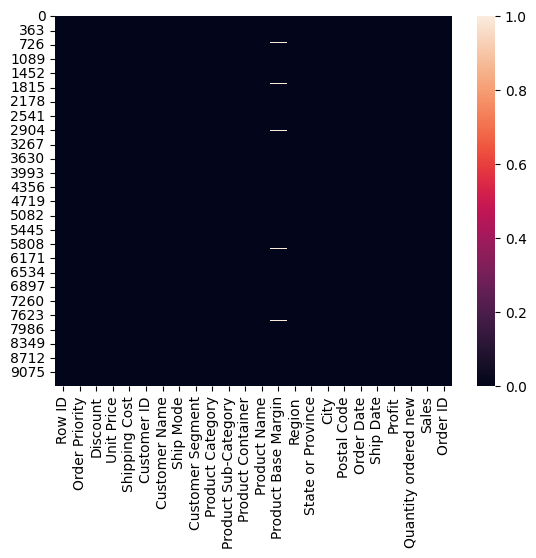

In [6]:
sns.heatmap(dataframe.isnull())
plt.show()


In [7]:
dataframe["Product Base Margin"].fillna(dataframe["Product Base Margin"].mean(), inplace=True)
dataframe["Product Base Margin"].isnull().sum()

C:\Users\Z\AppData\Local\Temp\ipykernel_10568\2173728997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe["Product Base Margin"].fillna(dataframe["Product Base Margin"].mean(), inplace=True)


np.int64(0)

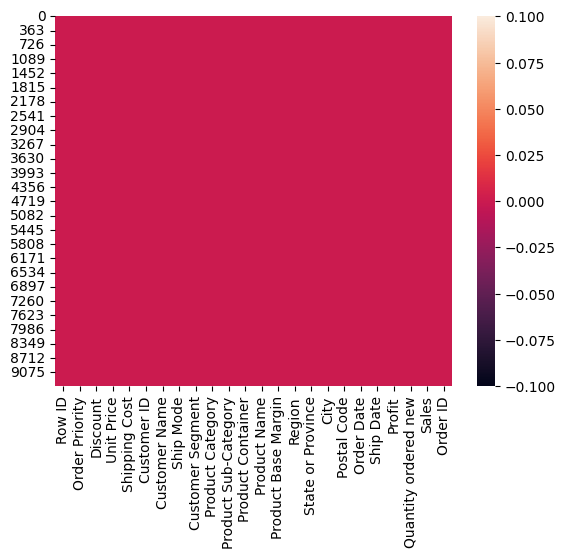

In [8]:
sns.heatmap(dataframe.isnull())
plt.show()

# Order Priority

In [9]:
dataframe["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [10]:
dataframe["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [11]:
dataframe["Order Priority"] = dataframe["Order Priority"].str.strip()
dataframe["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

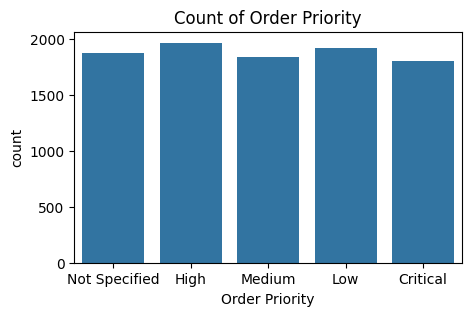

In [12]:
plt.figure(figsize=(5,3))
sns.countplot(x=dataframe['Order Priority'])
plt.xlabel("Order Priority")
plt.title("Count of Order Priority")
plt.show()

# Ship Mode

In [13]:
dataframe.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [14]:
dataframe["Ship Mode"].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [15]:
dataframe["Ship Mode"].unique()

array(['Regular Air', 'Express Air', 'Delivery Truck'], dtype=object)

In [24]:
x = dataframe["Ship Mode"].value_counts().index
y = dataframe["Ship Mode"].value_counts().values

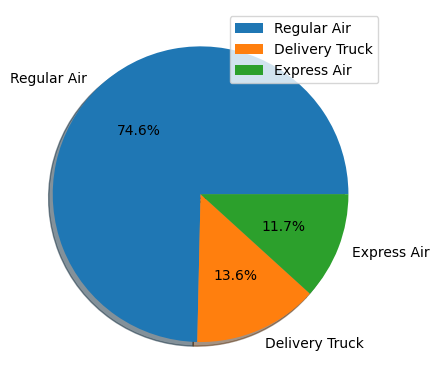

In [36]:
plt.pie(y, shadow=True, labels=x, autopct='%0.1f%%')
plt.legend()
plt.show()

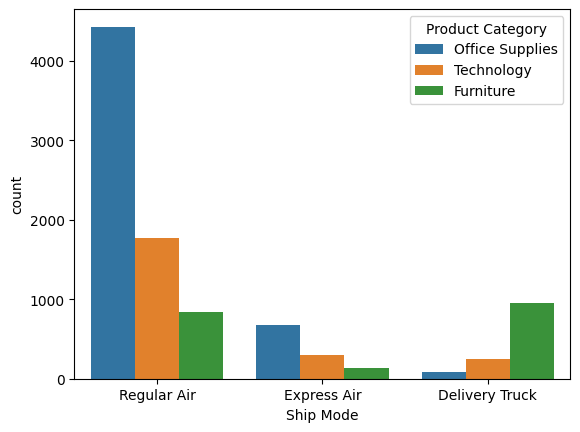

In [52]:
sns.countplot(x="Ship Mode", data=dataframe, hue="Product Category")
plt.show()

# Customer Segment

In [38]:
dataframe.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [39]:
dataframe["Customer Segment"].value_counts()

Customer Segment
Corporate         3375
Home Office       2316
Consumer          1894
Small Business    1841
Name: count, dtype: int64

In [40]:
dataframe["Customer Segment"].unique()

array(['Corporate', 'Home Office', 'Small Business', 'Consumer'],
      dtype=object)

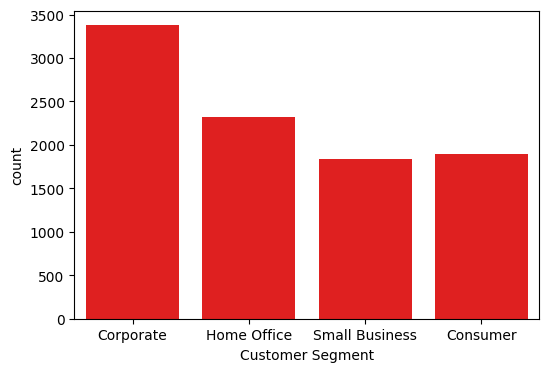

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment", data = dataframe, color="r")
plt.show()

C:\Users\Z\AppData\Local\Temp\ipykernel_10568\1888880033.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.countplot(x="Customer Segment", data = dataframe, hue="Product Category", color="r")


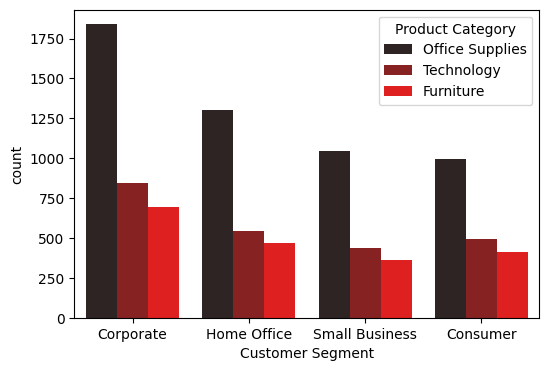

In [56]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment", data = dataframe, hue="Product Category", color="r")
plt.show()

# Product Category

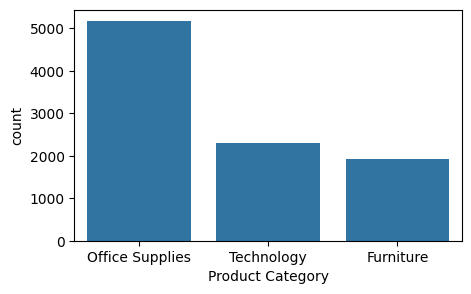

In [57]:
plt.figure(figsize=(5,3))
sns.countplot(x="Product Category", data = dataframe)
plt.show()

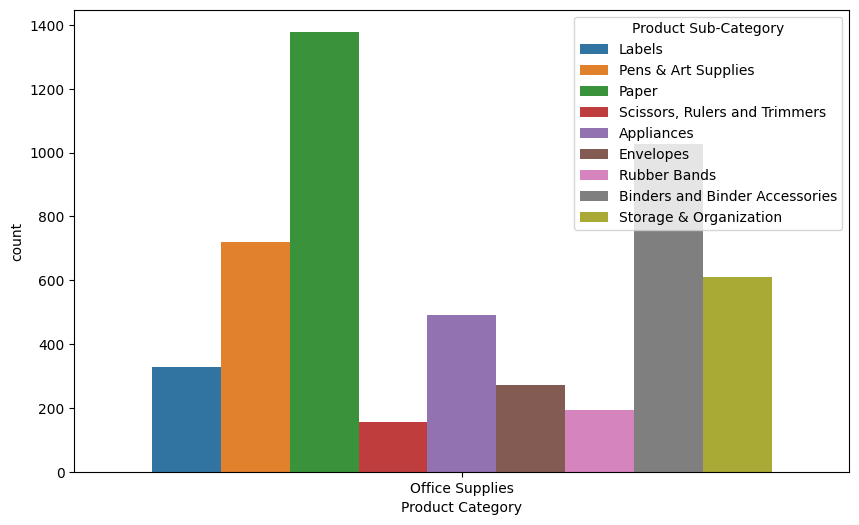

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data = dataframe[dataframe["Product Category"] == "Office Supplies"], hue="Product Sub-Category")
plt.show()

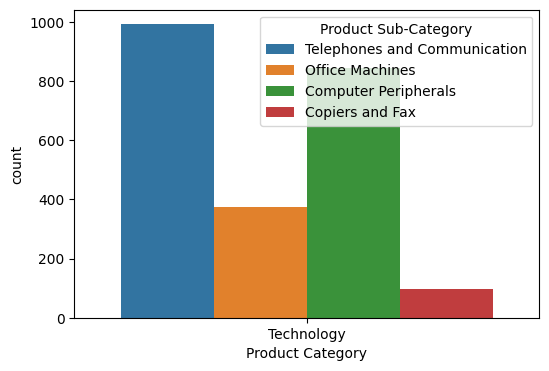

In [65]:
plt.figure(figsize=(6,4))
sns.countplot(x="Product Category", data = dataframe[dataframe["Product Category"] == "Technology"], hue="Product Sub-Category")
plt.show()

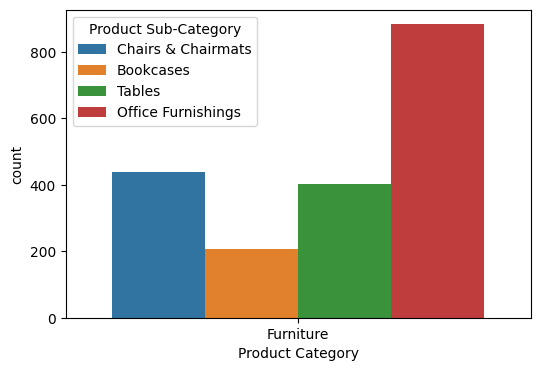

In [66]:
plt.figure(figsize=(6,4))
sns.countplot(x="Product Category", data = dataframe[dataframe["Product Category"] == "Furniture"], hue="Product Sub-Category")
plt.show()

# Order Year

In [67]:
dataframe.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [74]:
dataframe["Order year"] = dataframe["Order Date"].dt.year

In [78]:
dataframe["Order year"].value_counts()

Order year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

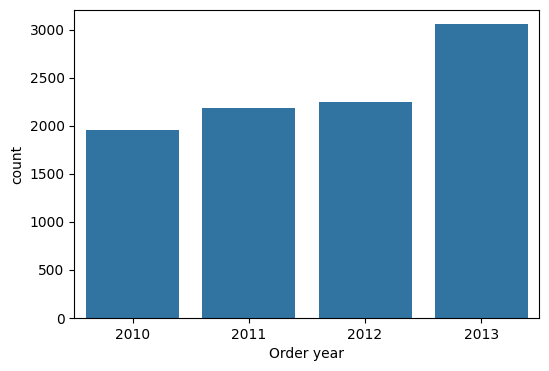

In [77]:
plt.figure(figsize=(6,4))
sns.countplot(x="Order year", data=dataframe)
plt.show()

# Profit

In [92]:
dataframe.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order year
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525,2012
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522,2010


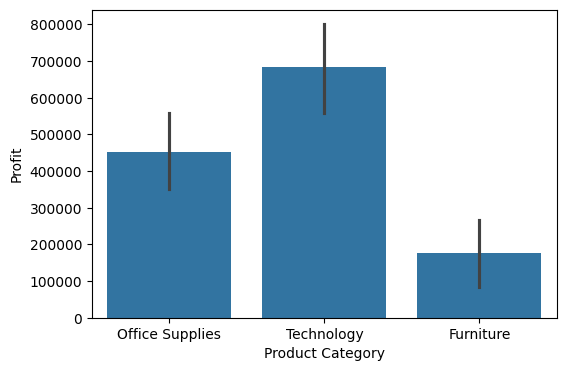

In [111]:
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category", y="Profit",data=dataframe, estimator="sum")
plt.show()

# Top 5 State or Province

In [95]:
dataframe.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order year
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525,2012
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522,2010


In [110]:
dataframe["State or Province"].value_counts()[:5]


State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

# Product Base Margin

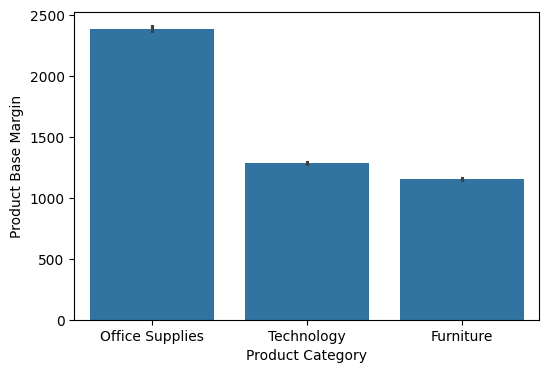

In [117]:
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category", y="Product Base Margin",data=dataframe, estimator="sum")
plt.show()